# Jupyter Notebook 3: Training from Scratch

In this notebook, you will write a function to perform gradient descent using backpropagation for a neural network with a single hidden layer and an arbitrary number of nodes.

Assume the activation function in each layer is the same and the loss function is the following variation of squared error:
$$ L(\mathbf{y}, \tilde{\mathbf{y}}) = \frac{1}{n} \sum_{i=1}^n \frac{1}{2} \Vert \mathbf{y} - \tilde{\mathbf{y}} \Vert^2 ,$$
where $n$ is the number of samples.

[(0.4769537490554331, 0.8399380120701496, 1), (0.6941261810578314, 0.8703555406449119, 1), (0.9079887575459813, 0.9893353221884155, 1), (0.34544646987944283, 0.37623332994387215, 1), (0.6563311995372767, 0.9748029427550182, 1), (0.31617126048167643, 0.24604090648691324, 1), (0.1377157413929221, 0.03944667006478042, 1), (0.49704330474841063, 0.9964851878874488, 1), (0.0665710917330734, 0.6249823244706862, 1), (0.16411855059467484, 0.1570737181984152, 1), (0.7443484453852066, 0.1282472949317428, 0), (0.4251275592497069, 0.009047256662075509, 0), (0.9792353795865231, 0.934074151519706, 0), (0.8340423891979273, 0.3825297430934016, 0), (0.6448694684675026, 0.07136661933332422, 0), (0.8837993979260166, 0.1736014757683224, 0), (0.6666967869607976, 0.3679548476080752, 0), (0.9793874853081406, 0.45144240694423965, 0), (0.8180875020710847, 0.3188129060816932, 0), (0.589427288675588, 0.1742779176991618, 0)]
[[0.47695375 0.83993801 1.        ]
 [0.69412618 0.87035554 1.        ]
 [0.90798876 0.989

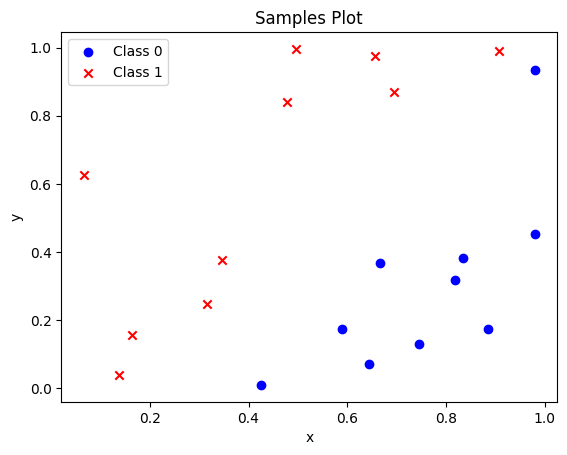

In [8]:
# First, let's define some random data for you to work with. 
# The data is in the form of a list of tuples, where each tuple contains three elements: x, y, and a class label. 
# The class label is either 0 or 1. 
# The data is generated such that the class label is 1 if y >= x**2 and 0 otherwise. 
# The data is then converted to a NumPy array.
# The data is plotted using Matplotlib, where the samples are colored based on their class label.
# Finally, we store the training data into two arrays. 

import numpy as np

# Generate 10 samples of the form (x, y, 1) where y >= x**2
samples_class_1 = []
while len(samples_class_1) < 10:
    x = np.random.rand()
    y = np.random.rand()
    if y >= x**2:
        samples_class_1.append((x, y, 1))

# Generate 10 samples of the form (x, y, 0) where y < x**2
samples_class_0 = []
while len(samples_class_0) < 10:
    x = np.random.rand()
    y = np.random.rand()
    if y < x**2:
        samples_class_0.append((x, y, 0))

# Combine the samples
samples = samples_class_1 + samples_class_0
print(samples)

# Convert to a NumPy array
samples_array = np.array(samples)
print(samples_array)

import matplotlib.pyplot as plt

# Separate the samples based on their class
class_0 = samples_array[samples_array[:, 2] == 0]
class_1 = samples_array[samples_array[:, 2] == 1]

# Plot the samples
plt.scatter(class_0[:, 0], class_0[:, 1], color='blue', marker='o', label='Class 0')
plt.scatter(class_1[:, 0], class_1[:, 1], color='red', marker='x', label='Class 1')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Samples Plot')
plt.show()

# Separate the samples into features and labels
train_points = samples_array[:, :2]
train_labels = samples_array[:, 2]

In [1]:
# define loss function
import numpy as np
def loss(y_true, y_pred):
    return 0.5 * np.math.norm(y_true - y_pred) ** 2

# define possible activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def ReLU(x):
    return np.maximum(0, x)


In [ ]:
# define the neural network
num_input = 2 # number of input neurons
num_hidden = 3 # number of hidden neurons
num_output = 1 # number of output neurons
activation = sigmoid # possible values are sigmoid or ReLU
learning_rate = 0.01

### **Problem 1**

Define a function `model-compile` that takes as input `num_input`, `num_hidden`, `num_output`, and `activation` and returns randomized model weights $W^2, W^3$ and biases ${\bf b}^2, {\bf b}^3$ in the range $[0,1)$. Define these outputs as `W2`, `W3`, `b2`, and `b3`.

### **Problem 2**

Define functions for applying each layer to get a pre-activated layer (call these functions `layer1`, `layer2`, etc.) and a function to compute the whole model given an input called `model`.

### **Problem 3**

Compute and define the functions `sigmoid_derivative` and `ReLU_derivative`.

### **Problem 4**

Compute the gradient of the loss function with respect to the final layer. Then define the function `loss_grad_final_layer`. *Hint: Your input will be the same input should be a NumPy array representing the final layer, and your output will be a NumPy array*

### **Problem 5**

Write a function to compute the gradient vector of the loss function with respect to the model weights and biases. Call it `model-gradient`. *Hint: your input will be your model paramters and your output will be the partial of the loss function with respect to each paramter.*

### **Problem 6**

Write a function to perform gradient descent to update your model weights. Note, one of your inputs will be `learning_rate`.

### **Problem 7**

Write a function to perform a training loop for your model. That is, your loop should use your functions to compute the gradients of your loss function with respect to your parameters and update your model weights with gradient descent for some number of epochs. Your function should print checkpoints like the number of each iteration and current value of the loss function.

### **Problem 8**

Train your model. Run at least 10 iterations of gradient descent.